In [1]:
import sklearn
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.21.2.


In [2]:
def build_model(n_hidden=2, n_neurons=5, lr=0.01, input_shape=[3]):
    """
    Constrói um modelo Keras com base nos parâmetros de entrada.
    
    :param n_hidden: Número de camadas escondidas (hidden layers)
    :param n_neurons: Número de unidades por camada
    :param lr: Taxa de aprendizagem (learning rate)
    :param input_shape: Formato dos dados de entrada
    :return: Um modelo Keras do tipo Sequencial
    """
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    # com n_hidden camadas densas escondidas
    # Função de activação relu
    for i in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    # Camada de saída
    # Perda medida pelo mse (mean squared error)
    # Optimizador SGD (Stochastic Gradiente Descent)
    model.add(keras.layers.Dense(1))
    model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=lr))
    return model


In [3]:
import random
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Dados sintéticos para teste
def create_dataset(n):
    random.seed(123)
    a, b, c, y = [], [], [], []
    for i in range(n):
        aa = i / 10 + random.uniform(-4, 3)
        bb = i / 30 + random.uniform(-4, 4)
        cc = i / 40 + random.uniform(-3, 3) - 5
        yy = (aa + bb + cc / 2) / 3
        a.append([aa])
        b.append([bb])
        c.append([cc])
        y.append([yy])
    return np.hstack([a, b, c]), np.array(y)

# Funções gráficas utilitárias
def plot_features_vs_y(x, y):
    """
    Gráfico de váriasfeatures vs labels

    :param x: matriz de features
    :param y: coluna vector de labels
    :return:
    """
    n = len(y)
    x_ax = range(n)
    plt.plot(x_ax, x, 'o', label="feature", markersize=3)
    plt.plot(x_ax, y, lw=1.5, color="red", label="y")
    plt.legend()
    plt.show()

# Funções gráficas utilitárias
def plot_y_vs_y_pred(y, y_pred):
    """
    Gráfico de y e y_predeicted
    :param y: valores de y reais
    :param y_pred: valores de y previstos
    """
    plt.plot(y, label="y-original")
    plt.plot(y_pred, label="y-predicted")
    plt.legend()
    plt.show()

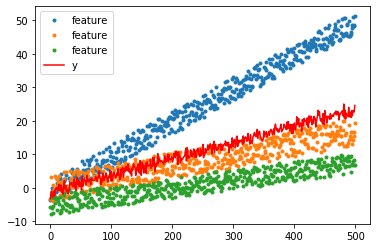

In [4]:
x, y = create_dataset(500)
plot_features_vs_y(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [5]:
# KerasRegressor
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [6]:
# Fit com os parâmetros fornecidos à rede por defeito
keras_reg.fit(x_train, y_train, epochs=100,
                  validation_data=(x_valid, y_valid),
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(x_test, y_test)
y_pred = keras_reg.predict(x)

Train on 335 samples, validate on 83 samples
Epoch 1/100
335/335 [==============================] - 2s 5ms/sample - loss: 409.2585 - val_loss: 171.9465
Epoch 2/100
335/335 [==============================] - 0s 978us/sample - loss: 95.8968 - val_loss: 52.5334
Epoch 3/100
335/335 [==============================] - 0s 976us/sample - loss: 48.2683 - val_loss: 55.7182
Epoch 4/100
335/335 [==============================] - 0s 880us/sample - loss: 46.8890 - val_loss: 57.3222
Epoch 5/100
335/335 [==============================] - 0s 881us/sample - loss: 42.6135 - val_loss: 58.3846
Epoch 6/100
335/335 [==============================] - 0s 1ms/sample - loss: 42.2611 - val_loss: 57.4619
Epoch 7/100
335/335 [==============================] - 0s 1ms/sample - loss: 42.2293 - val_loss: 59.2975
Epoch 8/100
335/335 [==============================] - 0s 846us/sample - loss: 41.6576 - val_loss: 53.4282
Epoch 9/100
335/335 [==============================] - 0s 462us/sample - loss: 38.7587 - val_loss: 50.1

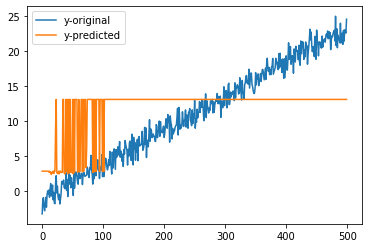

In [7]:
# Uma porcaria
plot_y_vs_y_pred(y, y_pred)

In [8]:
# Procurando os melhores parâmetros com RandomizedSearchCV
search_params = {
    'n_hidden': [1, 3, 5, 7],
    'n_neurons': np.arange(1, 100),
    'lr': reciprocal(3e-4, 3e-2)
}
rnd_search = RandomizedSearchCV(keras_reg, search_params, cv=3, n_iter=10)
rnd_search.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid),
               callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Train on 223 samples, validate on 83 samples
Epoch 1/100
223/223 [==============================] - 2s 8ms/sample - loss: nan - val_loss: nan
Epoch 2/100
223/223 [==============================] - 0s 649us/sample - loss: nan - val_loss: nan
Epoch 3/100
223/223 [==============================] - 0s 895us/sample - loss: nan - val_loss: nan
Epoch 4/100
223/223 [==============================] - 0s 856us/sample - loss: nan - val_loss: nan
Epoch 5/100
223/223 [==============================] - 0s 909us/sample - loss: nan - val_loss: nan
112/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Epoch 4/100
224/224 [==============================] - 0s 675us/sample - loss: nan - val_loss: nan
Epoch 5/100
224/224 [==============================] - 0s 506us/sample - loss: nan - val_loss: nan
111/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 224 samples, validate on 83 samples
Epoch 1/100
224/224 [==============================] - 1s 6ms/sample - loss: nan - val_loss: nan
Epoch 2/100
224/224 [==============================] - 0s 654us/sample - loss: nan - val_loss: nan
Epoch 3/100
224/224 [==============================] - 0s 554us/sample - loss: nan - val_loss: nan
Epoch 4/100
224/224 [==============================] - 0s 534us/sample - loss: nan - val_loss: nan
Epoch 5/100
224/224 [==============================] - 0s 371us/sample - loss: nan - val_loss: nan
111/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================

223/223 [==============================] - 0s 383us/sample - loss: 48.1447 - val_loss: 62.4525
Epoch 41/100
223/223 [==============================] - 0s 613us/sample - loss: 48.1374 - val_loss: 62.4120
Epoch 42/100
223/223 [==============================] - 0s 555us/sample - loss: 48.1442 - val_loss: 62.3789
Epoch 43/100
223/223 [==============================] - 0s 606us/sample - loss: 48.1173 - val_loss: 62.3440
Epoch 44/100
223/223 [==============================] - 0s 810us/sample - loss: 48.1093 - val_loss: 62.3158
Epoch 45/100
223/223 [==============================] - 0s 522us/sample - loss: 48.0994 - val_loss: 62.2942
Epoch 46/100
223/223 [==============================] - 0s 712us/sample - loss: 48.1139 - val_loss: 62.2755
Epoch 47/100
223/223 [==============================] - 0s 752us/sample - loss: 48.1113 - val_loss: 62.2602
Epoch 48/100
223/223 [==============================] - 0s 874us/sample - loss: 48.0994 - val_loss: 62.2426
Epoch 49/100
223/223 [===================

Epoch 7/100
223/223 [==============================] - 0s 468us/sample - loss: 83.6354 - val_loss: 102.2083
Epoch 8/100
223/223 [==============================] - 0s 476us/sample - loss: 76.9836 - val_loss: 95.5312
Epoch 9/100
223/223 [==============================] - 0s 491us/sample - loss: 71.5950 - val_loss: 90.0623
Epoch 10/100
223/223 [==============================] - 0s 448us/sample - loss: 67.2496 - val_loss: 85.5194
Epoch 11/100
223/223 [==============================] - 0s 576us/sample - loss: 63.6656 - val_loss: 81.7316
Epoch 12/100
223/223 [==============================] - 0s 1ms/sample - loss: 60.7675 - val_loss: 78.6188
Epoch 13/100
223/223 [==============================] - 0s 1ms/sample - loss: 58.3985 - val_loss: 76.0065
Epoch 14/100
223/223 [==============================] - 0s 986us/sample - loss: 56.4661 - val_loss: 73.8559
Epoch 15/100
223/223 [==============================] - 0s 844us/sample - loss: 54.8698 - val_loss: 72.0339
Epoch 16/100
223/223 [============

Train on 224 samples, validate on 83 samples
Epoch 1/100
224/224 [==============================] - 0s 2ms/sample - loss: 264.2828 - val_loss: 183.5778
Epoch 2/100
224/224 [==============================] - 0s 646us/sample - loss: 136.7369 - val_loss: 163.1719
Epoch 3/100
224/224 [==============================] - 0s 311us/sample - loss: 119.9621 - val_loss: 146.3326
Epoch 4/100
224/224 [==============================] - 0s 298us/sample - loss: 106.2587 - val_loss: 132.4198
Epoch 5/100
224/224 [==============================] - 0s 537us/sample - loss: 95.1297 - val_loss: 120.9254
Epoch 6/100
224/224 [==============================] - 0s 793us/sample - loss: 86.0272 - val_loss: 111.4363
Epoch 7/100
224/224 [==============================] - 0s 541us/sample - loss: 78.6109 - val_loss: 103.5812
Epoch 8/100
224/224 [==============================] - 0s 494us/sample - loss: 72.5927 - val_loss: 97.0482
Epoch 9/100
224/224 [==============================] - 0s 298us/sample - loss: 67.6556 - v

224/224 [==============================] - 0s 390us/sample - loss: 45.9563 - val_loss: 62.5857
Epoch 77/100
224/224 [==============================] - 0s 412us/sample - loss: 45.9414 - val_loss: 62.5864
Epoch 78/100
224/224 [==============================] - 0s 468us/sample - loss: 45.9308 - val_loss: 62.5839
Epoch 79/100
224/224 [==============================] - 0s 456us/sample - loss: 45.9347 - val_loss: 62.5798
Epoch 80/100
224/224 [==============================] - 0s 467us/sample - loss: 45.9270 - val_loss: 62.5767
Epoch 81/100
224/224 [==============================] - 0s 348us/sample - loss: 45.9415 - val_loss: 62.5719
Epoch 82/100
224/224 [==============================] - 0s 308us/sample - loss: 45.9318 - val_loss: 62.5769
Epoch 83/100
224/224 [==============================] - 0s 443us/sample - loss: 45.9388 - val_loss: 62.5813
Epoch 84/100
224/224 [==============================] - 0s 521us/sample - loss: 45.9437 - val_loss: 62.5833
Epoch 85/100
224/224 [===================

Epoch 34/100
223/223 [==============================] - 0s 515us/sample - loss: 69.5693 - val_loss: 91.2393
Epoch 35/100
223/223 [==============================] - 0s 420us/sample - loss: 68.1607 - val_loss: 89.6460
Epoch 36/100
223/223 [==============================] - 0s 461us/sample - loss: 66.8120 - val_loss: 88.1035
Epoch 37/100
223/223 [==============================] - 0s 483us/sample - loss: 65.5044 - val_loss: 86.6058
Epoch 38/100
223/223 [==============================] - 0s 570us/sample - loss: 64.2577 - val_loss: 85.1566
Epoch 39/100
223/223 [==============================] - 0s 440us/sample - loss: 63.0762 - val_loss: 83.7498
Epoch 40/100
223/223 [==============================] - 0s 419us/sample - loss: 61.8949 - val_loss: 82.3764
Epoch 41/100
223/223 [==============================] - 0s 644us/sample - loss: 60.7819 - val_loss: 81.0552
Epoch 42/100
223/223 [==============================] - 0s 669us/sample - loss: 59.7155 - val_loss: 79.7298
Epoch 43/100
223/223 [======

Train on 223 samples, validate on 83 samples
Epoch 1/100
223/223 [==============================] - 1s 3ms/sample - loss: nan - val_loss: nan
Epoch 2/100
223/223 [==============================] - 0s 409us/sample - loss: nan - val_loss: nan
Epoch 3/100
223/223 [==============================] - 0s 767us/sample - loss: nan - val_loss: nan
Epoch 4/100
223/223 [==============================] - 0s 1ms/sample - loss: nan - val_loss: nan
Epoch 5/100
223/223 [==============================] - 0s 793us/sample - loss: nan - val_loss: nan
112/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train on 223 samples, validate on 83 samples
Epoch 1/100
223/223 [==============================] - 1s 5ms/sample - loss: nan - val_loss: nan
Epoch 2/100
223/223 [==============================] - 0s 460us/sample - loss: nan - val_loss: nan
Epoch 3/100
223/223 [==============================] - 0s 1ms/sample - loss: nan - val_loss: nan
Epoch 4/100
223/223 [==============================] - 0s 1ms/sample - loss: nan - val_loss: nan
Epoch 5/100
223/223 [==============================] - 0s 1ms/sample - loss: nan - val_loss: nan
112/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================

224/224 [==============================] - 0s 1ms/sample - loss: nan - val_loss: nan
Epoch 3/100
224/224 [==============================] - 0s 1ms/sample - loss: nan - val_loss: nan
Epoch 4/100
224/224 [==============================] - 0s 1ms/sample - loss: nan - val_loss: nan
Epoch 5/100
224/224 [==============================] - 0s 1ms/sample - loss: nan - val_loss: nan
Epoch 6/100
224/224 [==============================] - 0s 1ms/sample - loss: nan - val_loss: nan
111/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Epoch 5/100
223/223 [==============================] - 0s 981us/sample - loss: nan - val_loss: nan
112/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

223/223 [==============================] - 0s 921us/sample - loss: 0.3003 - val_loss: 0.3516
Epoch 9/100
223/223 [==============================] - 0s 1ms/sample - loss: 0.2530 - val_loss: 0.2373
Epoch 10/100
223/223 [==============================] - 0s 1ms/sample - loss: 0.2308 - val_loss: 0.2244
Epoch 11/100
223/223 [==============================] - 0s 1ms/sample - loss: 0.2255 - val_loss: 0.2170
Epoch 12/100
223/223 [==============================] - 0s 1ms/sample - loss: 0.2193 - val_loss: 0.2368
Epoch 13/100
223/223 [==============================] - 0s 2ms/sample - loss: 0.2125 - val_loss: 0.2057
Epoch 14/100
223/223 [==============================] - 0s 677us/sample - loss: 0.2037 - val_loss: 0.2593
Epoch 15/100
223/223 [==============================] - 0s 348us/sample - loss: 0.2008 - val_loss: 0.2045
Epoch 16/100
223/223 [==============================] - 0s 316us/sample - loss: 0.2022 - val_loss: 0.1890
Epoch 17/100
223/223 [==============================] - 0s 470us/sampl

Epoch 86/100
223/223 [==============================] - 0s 982us/sample - loss: 0.1170 - val_loss: 0.1096
Epoch 87/100
223/223 [==============================] - 0s 971us/sample - loss: 0.1155 - val_loss: 0.1111
Epoch 88/100
223/223 [==============================] - 0s 1ms/sample - loss: 0.1157 - val_loss: 0.1085
Epoch 89/100
223/223 [==============================] - 0s 2ms/sample - loss: 0.1163 - val_loss: 0.1132
Epoch 90/100
223/223 [==============================] - 0s 1ms/sample - loss: 0.1161 - val_loss: 0.1076
Epoch 91/100
223/223 [==============================] - 0s 956us/sample - loss: 0.1135 - val_loss: 0.1075
Epoch 92/100
223/223 [==============================] - 0s 1ms/sample - loss: 0.1135 - val_loss: 0.1069
Epoch 93/100
223/223 [==============================] - 0s 2ms/sample - loss: 0.1128 - val_loss: 0.1086
Epoch 94/100
223/223 [==============================] - 0s 1ms/sample - loss: 0.1138 - val_loss: 0.1059
Epoch 95/100
223/223 [==============================] - 0s

223/223 [==============================] - 0s 788us/sample - loss: 0.1129 - val_loss: 0.1235
Epoch 32/100
223/223 [==============================] - 0s 615us/sample - loss: 0.1125 - val_loss: 0.1186
Epoch 33/100
223/223 [==============================] - 0s 592us/sample - loss: 0.1097 - val_loss: 0.1174
Epoch 34/100
223/223 [==============================] - 0s 493us/sample - loss: 0.1100 - val_loss: 0.1201
Epoch 35/100
223/223 [==============================] - 0s 511us/sample - loss: 0.1094 - val_loss: 0.1152
Epoch 36/100
223/223 [==============================] - 0s 792us/sample - loss: 0.1066 - val_loss: 0.1173
Epoch 37/100
223/223 [==============================] - 0s 745us/sample - loss: 0.1082 - val_loss: 0.1121
Epoch 38/100
223/223 [==============================] - 0s 529us/sample - loss: 0.1052 - val_loss: 0.1117
Epoch 39/100
223/223 [==============================] - 0s 335us/sample - loss: 0.1039 - val_loss: 0.1122
Epoch 40/100
223/223 [==============================] - 0s 

Train on 224 samples, validate on 83 samples
Epoch 1/100
224/224 [==============================] - 2s 8ms/sample - loss: 32.4028 - val_loss: 0.3176
Epoch 2/100
224/224 [==============================] - 0s 978us/sample - loss: 0.3434 - val_loss: 0.4865
Epoch 3/100
224/224 [==============================] - 0s 997us/sample - loss: 0.3508 - val_loss: 0.3099
Epoch 4/100
224/224 [==============================] - 0s 907us/sample - loss: 0.2861 - val_loss: 0.2700
Epoch 5/100
224/224 [==============================] - 0s 837us/sample - loss: 0.2445 - val_loss: 0.2342
Epoch 6/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.2436 - val_loss: 0.2684
Epoch 7/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.2226 - val_loss: 0.2291
Epoch 8/100
224/224 [==============================] - 0s 1ms/sample - loss: 0.2143 - val_loss: 0.2191
Epoch 9/100
224/224 [==============================] - 0s 331us/sample - loss: 0.2109 - val_loss: 0.2064
Epoch 10/100
224/

224/224 [==============================] - 0s 585us/sample - loss: 0.1117 - val_loss: 0.1056
Epoch 79/100
224/224 [==============================] - 0s 409us/sample - loss: 0.1105 - val_loss: 0.1053
Epoch 80/100
224/224 [==============================] - 0s 341us/sample - loss: 0.1102 - val_loss: 0.1050
Epoch 81/100
224/224 [==============================] - 0s 424us/sample - loss: 0.1099 - val_loss: 0.1061
Epoch 82/100
224/224 [==============================] - 0s 517us/sample - loss: 0.1107 - val_loss: 0.1066
Epoch 83/100
224/224 [==============================] - 0s 509us/sample - loss: 0.1095 - val_loss: 0.1037
Epoch 84/100
224/224 [==============================] - 0s 533us/sample - loss: 0.1086 - val_loss: 0.1037
Epoch 85/100
224/224 [==============================] - 0s 558us/sample - loss: 0.1083 - val_loss: 0.1034
Epoch 86/100
224/224 [==============================] - 0s 523us/sample - loss: 0.1081 - val_loss: 0.1029
Epoch 87/100
224/224 [==============================] - 0s 

Train on 223 samples, validate on 83 samples
Epoch 1/100
223/223 [==============================] - 1s 5ms/sample - loss: 66.5497 - val_loss: 114.4838
Epoch 2/100
223/223 [==============================] - 0s 433us/sample - loss: 46.4318 - val_loss: 0.6926
Epoch 3/100
223/223 [==============================] - 0s 454us/sample - loss: 1.9567 - val_loss: 14.9662
Epoch 4/100
223/223 [==============================] - 0s 589us/sample - loss: 16.5178 - val_loss: 6.9346
Epoch 5/100
223/223 [==============================] - 0s 797us/sample - loss: 13.4015 - val_loss: 11.6740
Epoch 6/100
223/223 [==============================] - 0s 915us/sample - loss: 9.8689 - val_loss: 7.1486
Epoch 7/100
223/223 [==============================] - 0s 572us/sample - loss: 8.4045 - val_loss: 15.3810
112/1 [==============================================================================================================================================================================================================

Train on 223 samples, validate on 83 samples
Epoch 1/100
223/223 [==============================] - 1s 4ms/sample - loss: 117.9308 - val_loss: 9.4886
Epoch 2/100
223/223 [==============================] - 0s 808us/sample - loss: 5.4749 - val_loss: 1.0584
Epoch 3/100
223/223 [==============================] - 0s 695us/sample - loss: 0.6633 - val_loss: 0.5962
Epoch 4/100
223/223 [==============================] - 0s 376us/sample - loss: 0.6298 - val_loss: 0.6136
Epoch 5/100
223/223 [==============================] - 0s 375us/sample - loss: 0.6174 - val_loss: 0.6235
Epoch 6/100
223/223 [==============================] - 0s 453us/sample - loss: 0.7334 - val_loss: 0.6787
Epoch 7/100
223/223 [==============================] - 0s 613us/sample - loss: 0.4957 - val_loss: 0.4777
Epoch 8/100
223/223 [==============================] - 0s 472us/sample - loss: 0.5389 - val_loss: 0.4825
Epoch 9/100
223/223 [==============================] - 0s 620us/sample - loss: 0.5712 - val_loss: 0.4188
Epoch 10/1

223/223 [==============================] - 0s 405us/sample - loss: 0.2022 - val_loss: 0.1149
Epoch 11/100
223/223 [==============================] - 0s 450us/sample - loss: 0.1039 - val_loss: 0.1364
Epoch 12/100
223/223 [==============================] - 0s 518us/sample - loss: 0.1002 - val_loss: 0.1067
Epoch 13/100
223/223 [==============================] - 0s 466us/sample - loss: 0.1131 - val_loss: 0.1338
Epoch 14/100
223/223 [==============================] - 0s 401us/sample - loss: 0.1256 - val_loss: 0.1283
Epoch 15/100
223/223 [==============================] - 0s 561us/sample - loss: 0.1110 - val_loss: 0.2208
Epoch 16/100
223/223 [==============================] - 0s 524us/sample - loss: 0.2705 - val_loss: 0.4154
Epoch 17/100
223/223 [==============================] - 0s 867us/sample - loss: 0.4908 - val_loss: 0.2646
112/1 [==============================================================================================================================================================

Epoch 38/100
224/224 [==============================] - 0s 433us/sample - loss: 0.1632 - val_loss: 0.1647
Epoch 39/100
224/224 [==============================] - 0s 544us/sample - loss: 0.1634 - val_loss: 0.1703
Epoch 40/100
224/224 [==============================] - 0s 837us/sample - loss: 0.1621 - val_loss: 0.1686
Epoch 41/100
224/224 [==============================] - 0s 736us/sample - loss: 0.1647 - val_loss: 0.1655
Epoch 42/100
224/224 [==============================] - 0s 788us/sample - loss: 0.1623 - val_loss: 0.1573
Epoch 43/100
224/224 [==============================] - 0s 663us/sample - loss: 0.1556 - val_loss: 0.1556
Epoch 44/100
224/224 [==============================] - 0s 824us/sample - loss: 0.1521 - val_loss: 0.1545
Epoch 45/100
224/224 [==============================] - 0s 476us/sample - loss: 0.1505 - val_loss: 0.1545
Epoch 46/100
224/224 [==============================] - 0s 520us/sample - loss: 0.1493 - val_loss: 0.1506
Epoch 47/100
224/224 [========================

Train on 223 samples, validate on 83 samples
Epoch 1/100
223/223 [==============================] - 2s 10ms/sample - loss: 71.0921 - val_loss: 209.8656
Epoch 2/100
223/223 [==============================] - 0s 880us/sample - loss: 168.4430 - val_loss: 166.7364
Epoch 3/100
223/223 [==============================] - 0s 761us/sample - loss: 83.6932 - val_loss: 205.0351
Epoch 4/100
223/223 [==============================] - 0s 505us/sample - loss: 168.9527 - val_loss: 198.0841
Epoch 5/100
223/223 [==============================] - 0s 692us/sample - loss: 162.4033 - val_loss: 187.9540
Epoch 6/100
223/223 [==============================] - 0s 609us/sample - loss: 138.0210 - val_loss: 42.7556
Epoch 7/100
223/223 [==============================] - 0s 839us/sample - loss: 55.4334 - val_loss: 1.0679
Epoch 8/100
223/223 [==============================] - 0s 607us/sample - loss: 51.8953 - val_loss: 104.2503
Epoch 9/100
223/223 [==============================] - 0s 721us/sample - loss: 49.0459 - va

Train on 224 samples, validate on 83 samples
Epoch 1/100
224/224 [==============================] - 2s 8ms/sample - loss: 117.9729 - val_loss: 12.4180
Epoch 2/100
224/224 [==============================] - 0s 488us/sample - loss: 43.9847 - val_loss: 66.1304
Epoch 3/100
224/224 [==============================] - 0s 430us/sample - loss: 108.1862 - val_loss: 24.8720
Epoch 4/100
224/224 [==============================] - 0s 434us/sample - loss: 20.3771 - val_loss: 123.0591
Epoch 5/100
224/224 [==============================] - 0s 494us/sample - loss: 22.2212 - val_loss: 34.6714
Epoch 6/100
224/224 [==============================] - 0s 1ms/sample - loss: 32.5522 - val_loss: 52.0128
111/1 [===================================================================================================================================================================================================================================================================================================================

/home/manuel/anaconda3/envs/tf_2_00/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train on 335 samples, validate on 83 samples
Epoch 1/100
335/335 [==============================] - 1s 4ms/sample - loss: 32.7883 - val_loss: 0.4955
Epoch 2/100
335/335 [==============================] - 0s 421us/sample - loss: 0.4056 - val_loss: 0.4044
Epoch 3/100
335/335 [==============================] - 0s 1ms/sample - loss: 0.3704 - val_loss: 0.3938
Epoch 4/100
335/335 [==============================] - 0s 515us/sample - loss: 0.3324 - val_loss: 0.3533
Epoch 5/100
335/335 [==============================] - 0s 363us/sample - loss: 0.3178 - val_loss: 0.3030
Epoch 6/100
335/335 [==============================] - 0s 404us/sample - loss: 0.2843 - val_loss: 0.2848
Epoch 7/100
335/335 [==============================] - 0s 578us/sample - loss: 0.2661 - val_loss: 0.2602
Epoch 8/100
335/335 [==============================] - 0s 1ms/sample - loss: 0.2553 - val_loss: 0.2562
Epoch 9/100
335/335 [==============================] - 0s 1ms/sample - loss: 0.2492 - val_loss: 0.2420
Epoch 10/100
335/

335/335 [==============================] - 0s 410us/sample - loss: 0.0765 - val_loss: 0.0935
Epoch 79/100
335/335 [==============================] - 0s 393us/sample - loss: 0.0758 - val_loss: 0.0920
Epoch 80/100
335/335 [==============================] - 0s 418us/sample - loss: 0.0749 - val_loss: 0.0912
Epoch 81/100
335/335 [==============================] - 0s 483us/sample - loss: 0.0744 - val_loss: 0.0905
Epoch 82/100
335/335 [==============================] - 0s 358us/sample - loss: 0.0736 - val_loss: 0.0904
Epoch 83/100
335/335 [==============================] - 0s 379us/sample - loss: 0.0729 - val_loss: 0.0892
Epoch 84/100
335/335 [==============================] - 0s 667us/sample - loss: 0.0724 - val_loss: 0.0883
Epoch 85/100
335/335 [==============================] - 0s 864us/sample - loss: 0.0717 - val_loss: 0.0876
Epoch 86/100
335/335 [==============================] - 0s 750us/sample - loss: 0.0709 - val_loss: 0.0869
Epoch 87/100
335/335 [==============================] - 0s 

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fd8632d3e50>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'lr': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd838745890>,
                                        'n_hidden': [1, 3, 5, 7],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_

In [9]:
print(rnd_search.best_params_)
print(rnd_search.best_score_)

{'lr': 0.0003324025082386545, 'n_hidden': 5, 'n_neurons': 72}
-0.0959676226573204


In [10]:
# Com os melhores parâmetros, reconstruir o modelo
my_best_model = build_model(n_hidden=rnd_search.best_params_['n_hidden'], 
                            n_neurons=rnd_search.best_params_['n_neurons'], 
                            lr=rnd_search.best_params_['lr'], 
                            input_shape=[3])

my_best_model.fit(x=x_train,
                        y=y_train,
                        batch_size=12,
                        epochs=100, validation_data=(x_valid, y_valid))

y_pred = my_best_model.predict(x)


Train on 335 samples, validate on 83 samples
Epoch 1/100
335/335 [==============================] - 1s 3ms/sample - loss: 14.5876 - val_loss: 0.5045
Epoch 2/100
335/335 [==============================] - 0s 685us/sample - loss: 0.4230 - val_loss: 0.3848
Epoch 3/100
335/335 [==============================] - 0s 987us/sample - loss: 0.3347 - val_loss: 0.3192
Epoch 4/100
335/335 [==============================] - 0s 1ms/sample - loss: 0.3104 - val_loss: 0.2842
Epoch 5/100
335/335 [==============================] - 0s 818us/sample - loss: 0.2396 - val_loss: 0.2515
Epoch 6/100
335/335 [==============================] - 0s 738us/sample - loss: 0.2162 - val_loss: 0.1948
Epoch 7/100
335/335 [==============================] - 0s 1ms/sample - loss: 0.1912 - val_loss: 0.1752
Epoch 8/100
335/335 [==============================] - 0s 1ms/sample - loss: 0.1555 - val_loss: 0.1615
Epoch 9/100
335/335 [==============================] - 0s 925us/sample - loss: 0.1419 - val_loss: 0.1496
Epoch 10/100
335/

Epoch 79/100
335/335 [==============================] - 0s 1ms/sample - loss: 0.0397 - val_loss: 0.0390
Epoch 80/100
335/335 [==============================] - 0s 1ms/sample - loss: 0.0386 - val_loss: 0.0385
Epoch 81/100
335/335 [==============================] - 0s 1ms/sample - loss: 0.0387 - val_loss: 0.0378
Epoch 82/100
335/335 [==============================] - 0s 1ms/sample - loss: 0.0375 - val_loss: 0.0387
Epoch 83/100
335/335 [==============================] - 0s 1ms/sample - loss: 0.0386 - val_loss: 0.0373
Epoch 84/100
335/335 [==============================] - 0s 1ms/sample - loss: 0.0368 - val_loss: 0.0361
Epoch 85/100
335/335 [==============================] - 1s 2ms/sample - loss: 0.0365 - val_loss: 0.0359
Epoch 86/100
335/335 [==============================] - 1s 2ms/sample - loss: 0.0362 - val_loss: 0.0367
Epoch 87/100
335/335 [==============================] - 0s 1ms/sample - loss: 0.0355 - val_loss: 0.0346
Epoch 88/100
335/335 [==============================] - 0s 1ms/s

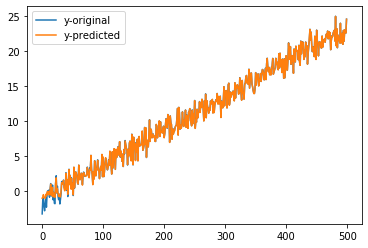

In [11]:
plot_y_vs_y_pred(y, y_pred)